In [1]:
using RDatasets, DataFrames, CairoMakie, GLM, CSV
CairoMakie.activate!()
Makie.inline!(true)

true

In [2]:
RDatasets.datasets("datasets")

Row,Package,Dataset,Title,Rows,Columns
,String15,String31,String,Int64,Int64
1,datasets,BOD,Biochemical Oxygen Demand,6,2
2,datasets,CO2,Carbon Dioxide Uptake in Grass Plants,84,5
3,datasets,Formaldehyde,Determination of Formaldehyde,6,2
4,datasets,HairEyeColor,Hair and Eye Color of Statistics Students,32,4
5,datasets,InsectSprays,Effectiveness of Insect Sprays,72,2
6,datasets,LifeCycleSavings,Intercountry Life-Cycle Savings Data,50,6
7,datasets,Loblolly,Growth of Loblolly pine trees,84,4
8,datasets,OrchardSprays,Potency of Orchard Sprays,64,4
9,datasets,PlantGrowth,Results from an Experiment on Plant Growth,30,2


In [3]:
stop_distance = RDatasets.dataset("datasets","cars")

Row,Speed,Dist
,Int64,Int64
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10
7,10,18
8,10,26
9,10,34


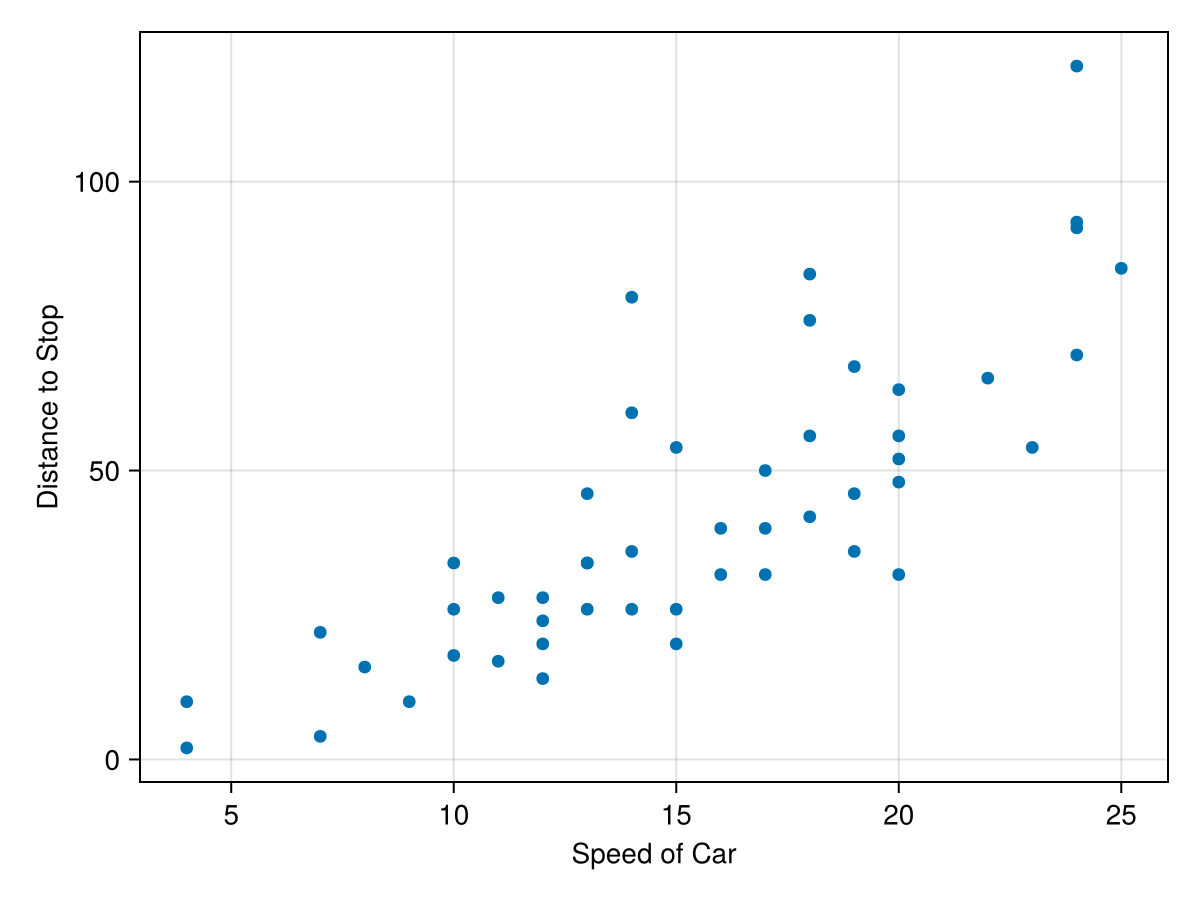

In [4]:
fig = Figure()
ax = Axis(fig[1,1], xlabel="Speed of Car", ylabel = "Distance to Stop")
scatter!(ax, stop_distance.Speed, stop_distance.Dist)
fig

In [5]:
save("../assets/plots/linear-regression/speed-dist.png", fig)

CairoMakie.Screen{IMAGE}


In [6]:
data = DataFrame(x=[1,3,4,6,7,9, 10], y = [10, 9, 7, 6, 5, 4, 2])

Row,x,y
,Int64,Int64
1,1,10
2,3,9
3,4,7
4,6,6
5,7,5
6,9,4
7,10,2


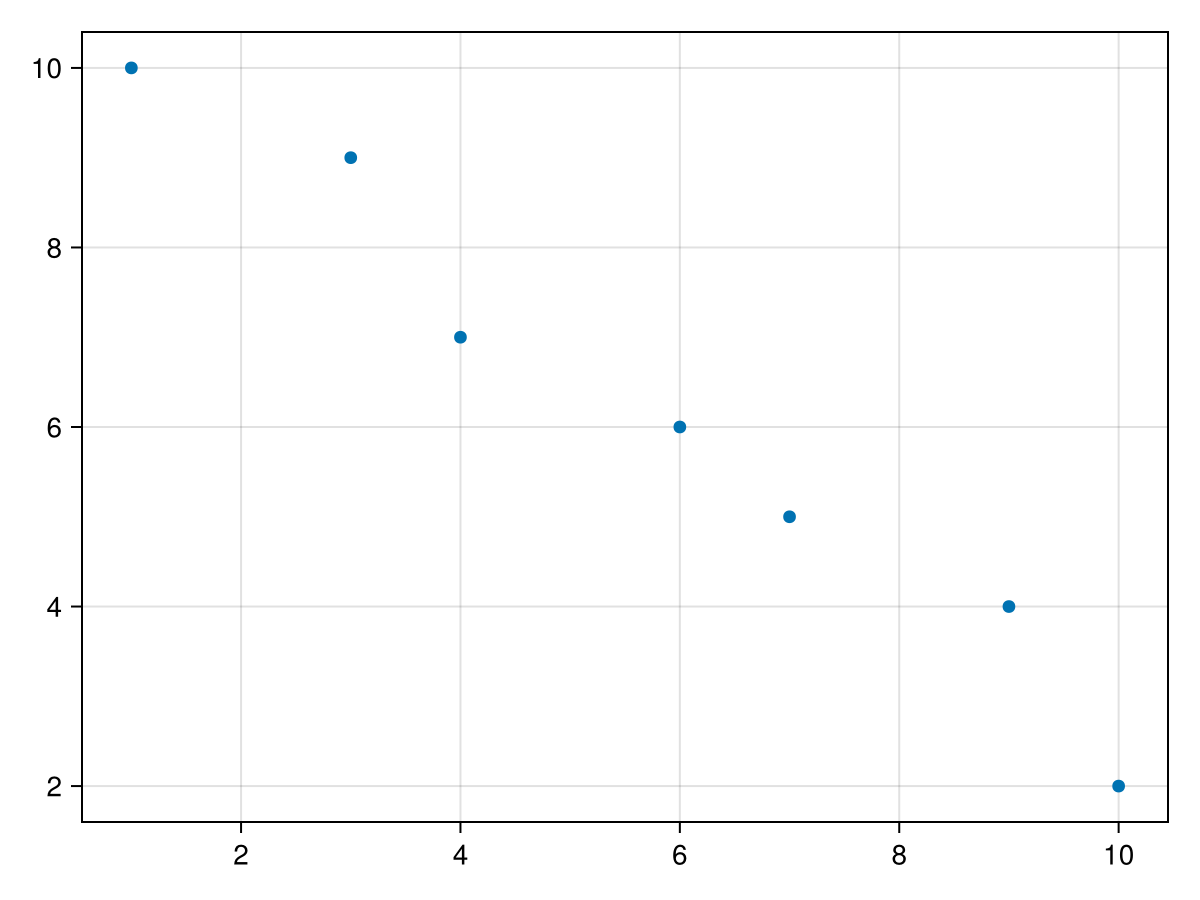

In [7]:
fig = scatter(data.x, data.y)

In [8]:
save("../assets/plots/linear-regression/simple-scatter.png", fig)

CairoMakie.Screen{IMAGE}


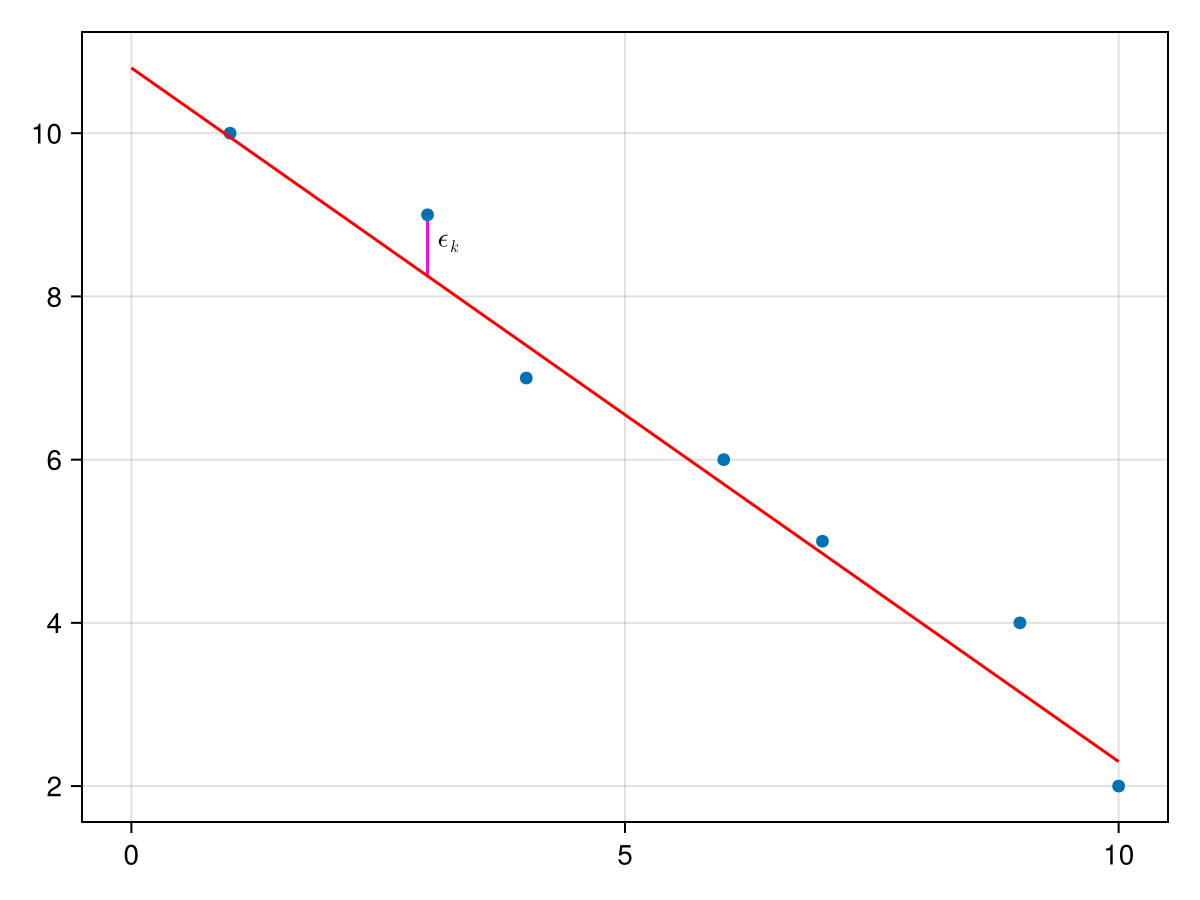

In [9]:
fig = Figure()
ax = Axis(fig[1,1])
lines!(ax,[3, 3],[9,10.8-0.85*3], color=:magenta)
scatter!(ax, data.x, data.y)
lines!(ax, 0..10, x->10.8-0.85x, color=:red)
text!(ax,3.1,8.5, text = L"\epsilon_k")
fig

In [10]:
save("../assets/plots/linear-regression/lr-diagram.png", fig)

CairoMakie.Screen{IMAGE}


In [11]:
Sx = sum(data.x)
Sy = sum(data.y)
Sxx = sum(x -> x^2, data.x)
Sxy = sum(data.x .* data.y)
Syy = sum(y -> y^2, data.y)

311

In [45]:
a = (length(data.x)*Sxy - Sx*Sy)/(length(data.x)*Sxx-Sx^2)
b = (Sy-a*Sx)/length(data.x)
a,b

(-0.8468468468468469, 10.981981981981983)

In [46]:
SSR = sum([(data.y[i] - a*data.x[i]-b)^2 for i=1:nrow(data) ])

1.3693693693693667

In [47]:
SSE = Syy -Sy^2/nrow(data)

46.85714285714283

In [48]:
rsq = 1-SSR/SSE

0.970775653702483

In [49]:
X = [data.x[i]^k for i=1:size(data,1), k=0:1]

7×2 Matrix{Int64}:
 1   1
 1   3
 1   4
 1   6
 1   7
 1   9
 1  10

In [50]:
c = inv(X'*X)*X'*data.y

2-element Vector{Float64}:
 10.981981981981981
 -0.846846846846846

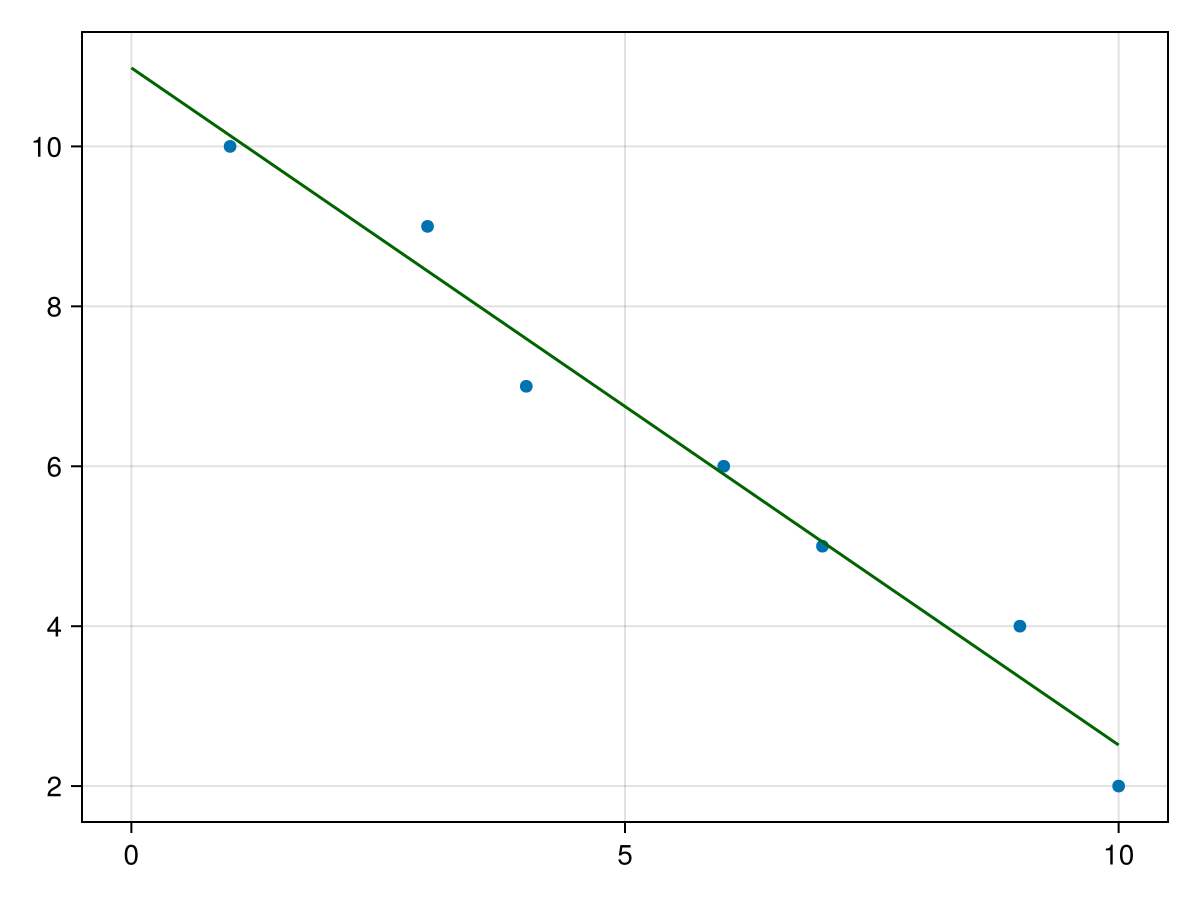

In [51]:
fig, ax = scatter(data.x,data.y)
lines!(ax,0..10,x -> c[2]*x+c[1], color = :darkgreen)
fig

In [16]:
save("../assets/plots/linear-regression/best-fit.png", fig)

CairoMakie.Screen{IMAGE}


In [53]:
(X*c-data.y)'*(X*c-data.y)

1.3693693693693678

In [17]:
data2 = DataFrame(x =-4:4, y = [15, 10, 5, 2, 1, 0, 3,8, 17])

Row,x,y
,Int64,Int64
1,-4,15
2,-3,10
3,-2,5
4,-1,2
5,0,1
6,1,0
7,2,3
8,3,8
9,4,17


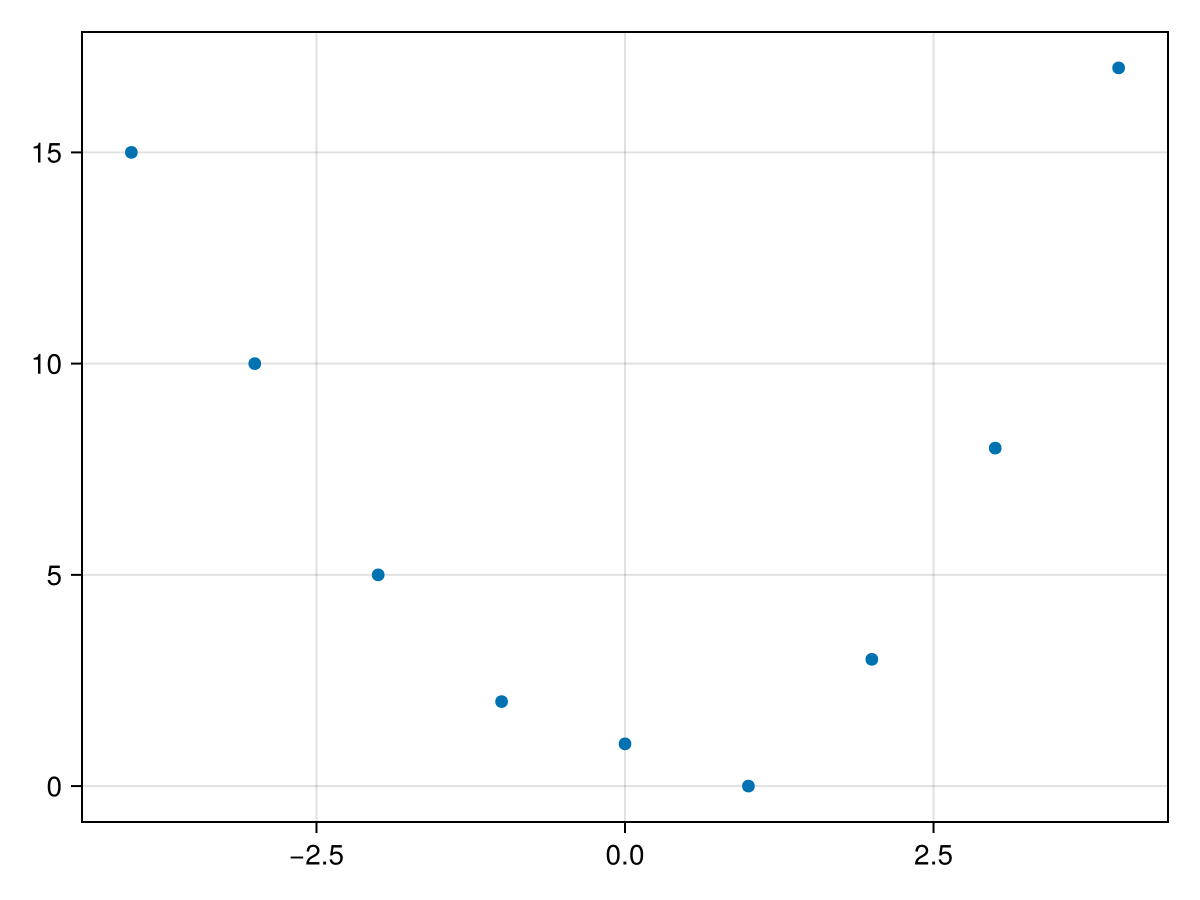

In [18]:
fig = scatter(data2.x, data2.y)

In [19]:
save("../assets/plots/linear-regression/quad-fit01.png", fig)

CairoMakie.Screen{IMAGE}


In [20]:
X = [data2.x[k]^i for k=1:nrow(data2), i=0:2]

9×3 Matrix{Int64}:
 1  -4  16
 1  -3   9
 1  -2   4
 1  -1   1
 1   0   0
 1   1   1
 1   2   4
 1   3   9
 1   4  16

In [21]:
c = inv(X'*X)*X'*data2.y

3-element Vector{Float64}:
  0.2554112554112532
 -0.06666666666666667
  0.9783549783549782

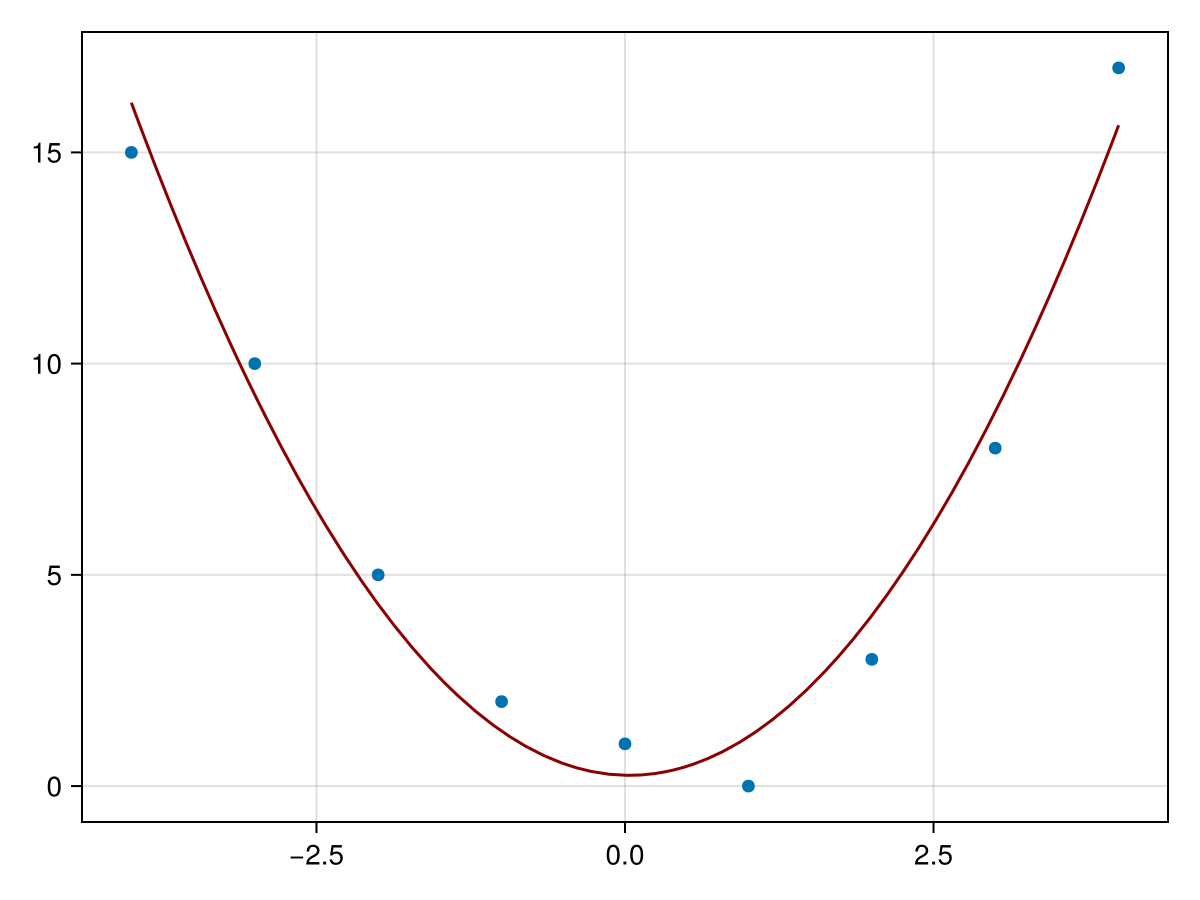

In [22]:
fig, ax = scatter(data2.x, data2.y)
lines!(ax,-4..4,x -> c[3]*x^2 + c[2]*x+c[1], color = :darkred)
fig

In [23]:
save("../assets/plots/linear-regression/quad-fit02.png", fig)

CairoMakie.Screen{IMAGE}


In [24]:
data3 = DataFrame(
  x = [1, 1, 2, 3, 3, 4, 5, 5, 6, 2, 4, 8],
  y = [1, 6, 8, 2, 2, 3, 7, 3, 1, 4, 9, 6],
  z = [14, 7, 4, 14, 13, 12, 7,  13, 16, 11, 4, 10])

Row,x,y,z
,Int64,Int64,Int64
1,1,1,14
2,1,6,7
3,2,8,4
4,3,2,14
5,3,2,13
6,4,3,12
7,5,7,7
8,5,3,13
9,6,1,16


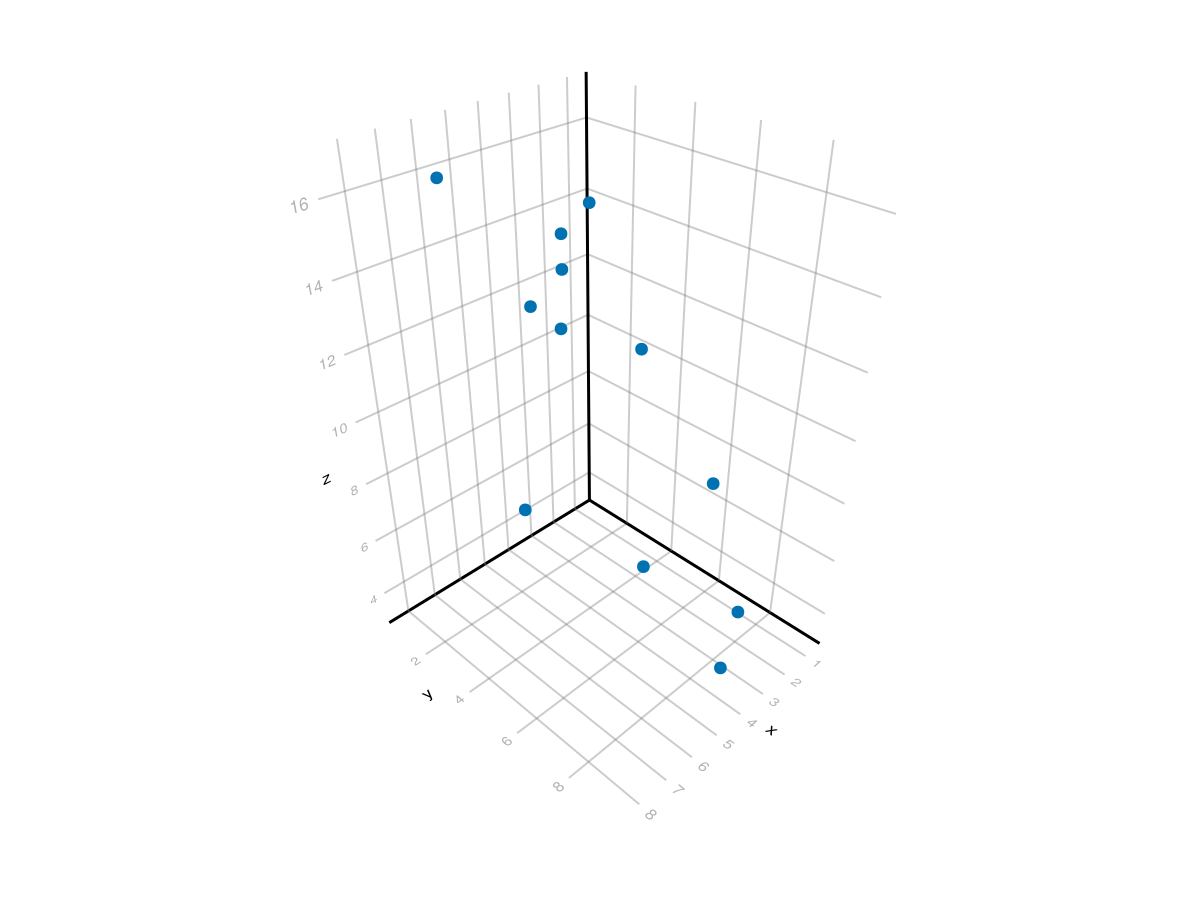

In [25]:
fig = scatter(data3.x, data3.y, data3.z)

In [26]:
save("../assets/plots/linear-regression/scatter3.png", fig)

CairoMakie.Screen{IMAGE}


In [27]:
X = ones(Int,size(data3,1),3)
X[:,2] = data3.x
X[:,3] = data3.y
X

12×3 Matrix{Int64}:
 1  1  1
 1  1  6
 1  2  8
 1  3  2
 1  3  2
 1  4  3
 1  5  7
 1  5  3
 1  6  1
 1  2  4
 1  4  9
 1  8  6

In [28]:
c = inv(X'*X)*X'*data3.z

3-element Vector{Float64}:
 15.133990247866722
  0.408533116619261
 -1.4342950020316934

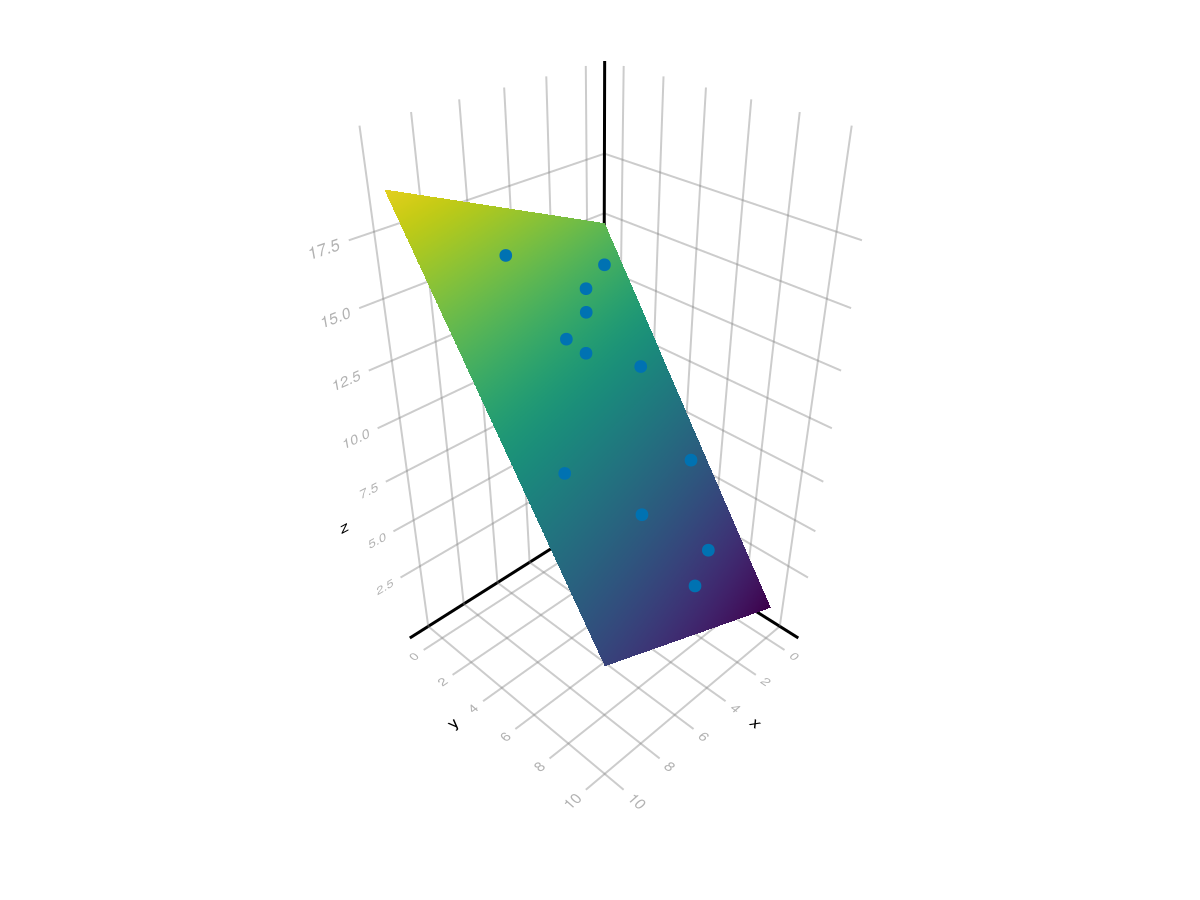

In [29]:
xpts = ypts = LinRange(0,10,100)
fig, ax = surface(xpts, ypts, [c[1].+c[2].*x .+ c[3] .* y for x in xpts, y in ypts])
scatter!(ax, data3.x, data3.y, data3.z)
fig

In [30]:
save("../assets/plots/linear-regression/scatter3-with-plane.png", fig)

CairoMakie.Screen{IMAGE}


### Fitting curves using GLM

In [31]:
fm = @formula(y ~ x)
model = lm(fm, data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  10.982      0.4244      25.88    <1e-05    9.89103  12.0729
x            -0.846847   0.0657102  -12.89    <1e-04   -1.01576  -0.677933
──────────────────────────────────────────────────────────────────────────

In [32]:
r2(model)

0.970775653702483

In [54]:
fm2 = @formula y ~ 1+x+x^2

FormulaTerm
Response:
  y(unknown)
Predictors:
  1
  x(unknown)
  (x)->x ^ 2

In [55]:
model2 = lm(fm2, data2)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x + :(x ^ 2)

Coefficients:
──────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)   0.255411     0.600744   0.43    0.6855  -1.21456    1.72538
x            -0.0666667    0.153459  -0.43    0.6792  -0.442168   0.308835
x ^ 2         0.978355     0.067732  14.44    <1e-05   0.812621   1.14409
──────────────────────────────────────────────────────────────────────────

In [56]:
r2(model2)

0.972071266946816

In [57]:
fm3 = @formula z ~ x + y
model3 = lm(fm3, data3)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

z ~ 1 + x + y

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  15.134      0.32197     47.00    <1e-11  14.4056    15.8623
x             0.408533   0.0623703    6.55    0.0001   0.267442   0.549625
y            -1.4343     0.0472865  -30.33    <1e-09  -1.54126   -1.32733
──────────────────────────────────────────────────────────────────────────

In [58]:
r2(model3)

0.9905202860004992

In [33]:
readdir("data")

4-element Vector{String}:
 "Life_Expectancy_Data.csv"
 "housing-data-ames-ia.csv"
 "housing_test.csv"
 "housing_train.csv"

In [34]:
df = CSV.read("data/housing-data-ames-ia.csv", DataFrame, normalizenames = true, missingstring = "NA")

Row,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,_1stFlrSF,_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,_3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,Int64,Int64,String7,Int64?,Int64,String7,String7?,String3,String3,String7,String7,String3,String7,String7,String7,String7,String7,Int64,Int64,Int64,Int64,String7,String7,String7,String7,String7?,Int64?,String3,String3,String7,String3?,String3?,String3?,String3?,Int64,String3?,Int64,Int64,Int64,String7,String3,String1,String7?,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String3,Int64,String7,Int64,String3?,String7?,Int64?,String3?,Int64,Int64,String3?,String3?,String1,Int64,Int64,Int64,Int64,Int64,Int64,String3?,String7?,String7?,Int64,Int64,Int64,String7,String7,Int64
1,1,60,RL,65,8450,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84,14260,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000
6,6,50,RL,85,14115,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,missing,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,missing,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,7,20,RL,75,10084,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,missing,missing,missing,0,8,2007,WD,Normal,307000
8,8,60,RL,missing,10382,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1

In [35]:
readdir("data")

4-element Vector{String}:
 "Life_Expectancy_Data.csv"
 "housing-data-ames-ia.csv"
 "housing_test.csv"
 "housing_train.csv"